# t-SNE Decomposition on MNIST Dataset

## What is tSNE?

 t-SNE is known as **t-Distribution Stochastic Neighbour Embedding**. It is a **non-linear dimensionality reduction** technique.

 It is a tool to visualize high dimensional data.

## How doe t-SNE work?

It converts similarities between data points to joint probabilities and tries to minimize the [Kullbeck-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence (aka **relative entropy**) between the joint probabilities of the low-dimensional embedding and the high dimensional data.

t-SNE has a cost function that is not convex i.e, with different initializations we can get different results.

## Key requirement for t-SNE

It is highly important to apply some other high dimensional reduction technique(*PCA or TruncatedSVD*) to be applied before **t-SNE**. It will reduce the number of dimension to resonable amount(eg.50) if the number of features is very high.

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.manifold import TSNE


## Load Dataset

In [2]:
# data from sklearn datasets
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

# Extract data & target from the dataset
pixel_data, targets = data
targets = targets.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print("Shape of Pixel data : {}".format(pixel_data.shape))

Shape of Pixel data : (70000, 784)


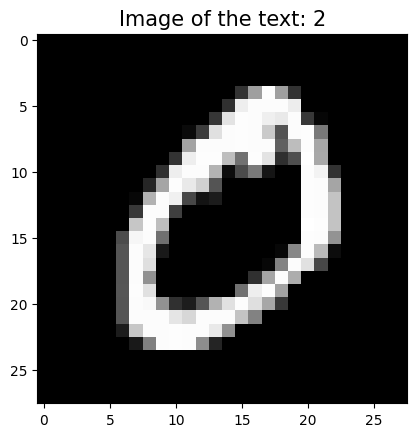

In [9]:
# Reshape the pixel data into 28x28
single_image = pixel_data.iloc[1, :].values.reshape(28,28)

plt.imshow(single_image, cmap='gray')
plt.title(f"Image of the text: {targets[5]}", fontsize=15)
plt.show()

## t-SNE Transformation

In this step we are going to perform two operations,
1. Transform the 3000 rows of image pixel data into t-SNE 2D transformed data
2. Assign target values to the transformed 2-D data points.

In [17]:
# Object of tSNE
tsne = TSNE(n_components=2, random_state=42)

x_transformed = tsne.fit_transform(pixel_data.iloc[:3000, :]) # Data upto 3000 rows

In [18]:
# convert the transformed data into dataframe
tsne_df = pd.DataFrame(np.column_stack((x_transformed, targets[:3000])), columns=['X', 'Y', "Targets"])


In [19]:
tsne_df

,X,Y,Targets
0,20.515184,-11.026083,5.0
1,57.560905,0.121864,0.0
2,-0.679077,-54.268143,4.0
3,-41.528664,11.559952,1.0
4,-10.032307,-33.632420,9.0
...,...,...,...
2995,-35.470184,-24.492340,7.0
2996,52.467827,-3.201818,0.0
2997,-30.010117,-13.070750,9.0
2998,-29.661884,45.717960,1.0


In [20]:
tsne_df.Targets.dtype

dtype('float64')

In [21]:
tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)

<ipython-input-21-13780e8d3005>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tsne_df.loc[:, "Targets"] = tsne_df.Targets.astype(int)


In [22]:
tsne_df.head(10)

,X,Y,Targets
0,20.515184,-11.026083,5
1,57.560905,0.121864,0
2,-0.679077,-54.268143,4
3,-41.528664,11.559952,1
4,-10.032307,-33.632420,9
5,-3.316504,29.633995,2
6,-27.243488,49.158920,1
7,8.781752,9.926254,3
8,-26.462122,43.754475,1
9,-13.260955,-17.032541,4


## Plot the t-SNE transformed data

The following plot depicts the cluster of data based on the target values in 2-Dimensional space.

<Figure size 1000x800 with 0 Axes>

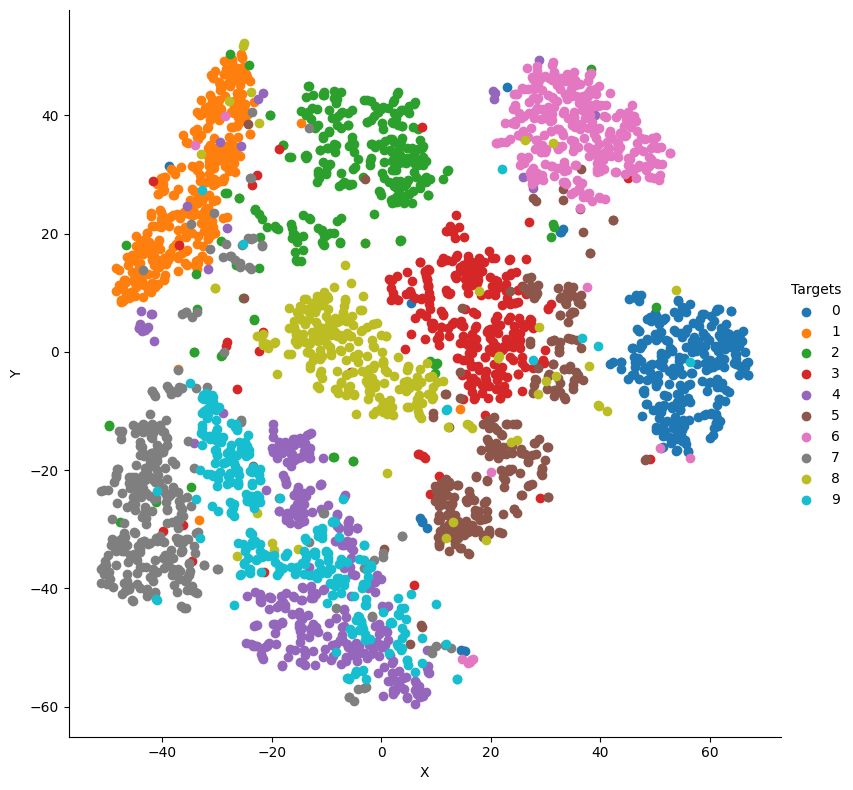

In [23]:
plt.figure(figsize=(10,8))

g = sns.FacetGrid(data=tsne_df, hue='Targets', height=8)

g.map(plt.scatter, 'X', 'Y').add_legend()

plt.show()